# Free energy corrections

In [11]:
import numpy as np
import os

In [2]:
work_dictionaries = np.load('work_dictionaries.npz', allow_pickle=True)
agg_dict, concat_dict = work_dictionaries['arr_0'].item(), work_dictionaries['arr_1'].item()
experimental = np.load('tyk2_experimental.npz')['arr_0']

In [3]:
from qmlify.analysis import compute_BAR

In [6]:
agg_BAR = compute_BAR(agg_dict)
concat_BAR = compute_BAR(concat_dict)

In [10]:
#extract the mm free energies...

In [19]:
corrected_concat_BAR = {}
for key, val in concat_BAR.items():
    new_val = {_key: _val[0] for _key, _val in val.items()}
    corrected_concat_BAR[key] = new_val

In [21]:
all_sims = []
for result_file in os.listdir('mm_data/'):
    if result_file[-2:] == 'pi':
        results = np.load(f"mm_data/{result_file}", allow_pickle=True)
        all_sims.append(results)

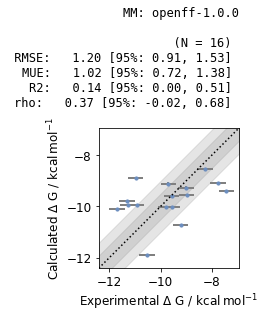

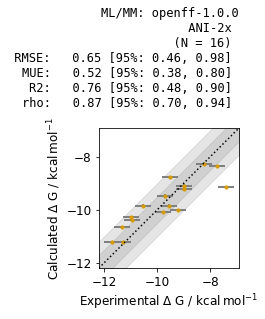

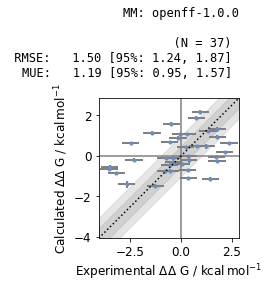

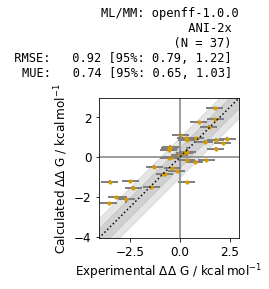

In [22]:
from qmlify.analysis import analyze_mlmm
analyze_mlmm(all_sims, corrected_concat_BAR, experimental = experimental)